# welcome 


### Data description 
### Main dataset: 
### This dataset informs the medical situation of individuals segregation the observations by municipality, serializing them and providing income data of each one of them. Also, it provides an specific score about overall health & the case of an specific condition.

In [1]:
import pandas as pd 
url3 = r"Main_Dataset.csv"
md = pd.read_csv(url3)
nule_values_md = md[md.isnull().any(axis=1)]

/tmp/ipykernel_61478/3052411170.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


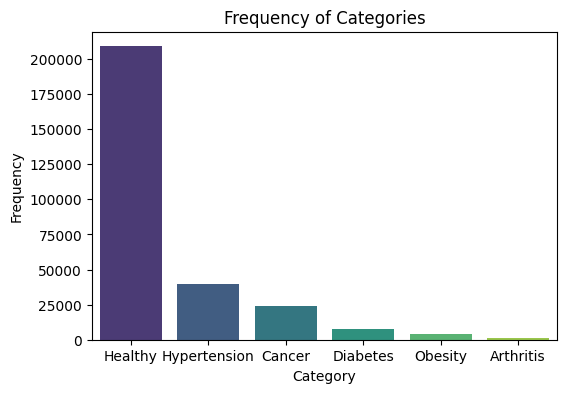

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Perform FULL OUTER JOIN with indicator
merged = md.merge(nule_values_md, on="ID", how="outer", indicator=True)

# Exclude intersection (i.e., rows present in both df1 and df2)
symmetric_diff = merged[merged["_merge"] != "both"].drop(columns=["_merge"])
symmetric_diff = symmetric_diff.drop(symmetric_diff.columns[12:23], axis=1)


category_counts = symmetric_diff['Medical_Condition_x'].value_counts()

# Create bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# Labels and title
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Frequency of Categories")
plt.show()

In [ ]:
url2 = r"Sociodemographics Data.csv"
sd = pd.read_csv(url2)
nule_values_sd = sd[sd.isnull().any(axis=1)]

In [ ]:

url1 = r"Municipality Pollution Data.csv"
mu = pd.read_csv(url1)
nule_values_mu = mu[mu.isnull().any(axis=1)]